# 추론 통계(Predictive Analysis)

- 일부 데이터로부터 전체의 통계적 성질을 추측

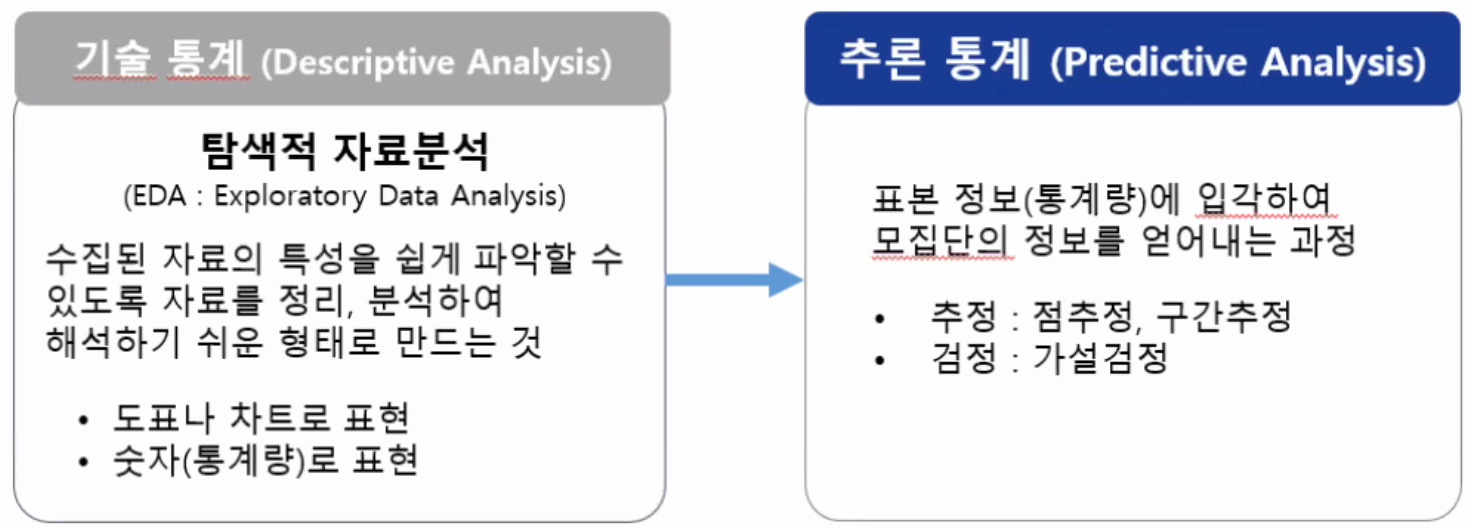

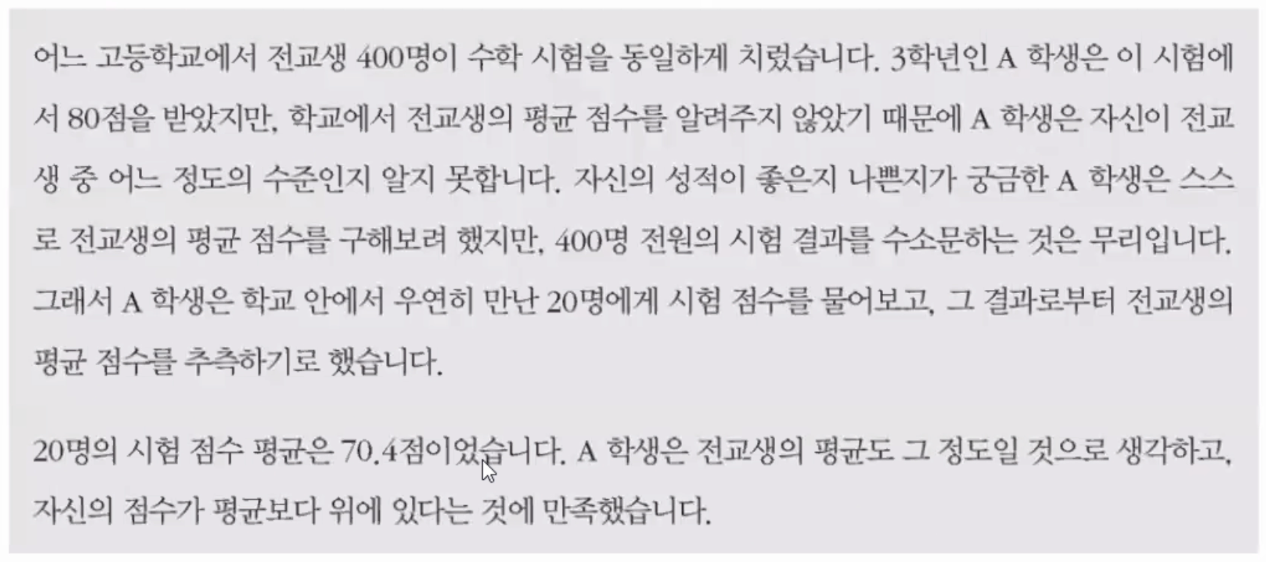


## 모집단과 표본

- 모집단(population) 
    - 조사 대상이 되는 관측 가능한 개체로 된 집단 전체
    
    
- 표본(sample)
    - 모집단에서 선택된 모집단 구성단위의 일부
    
    
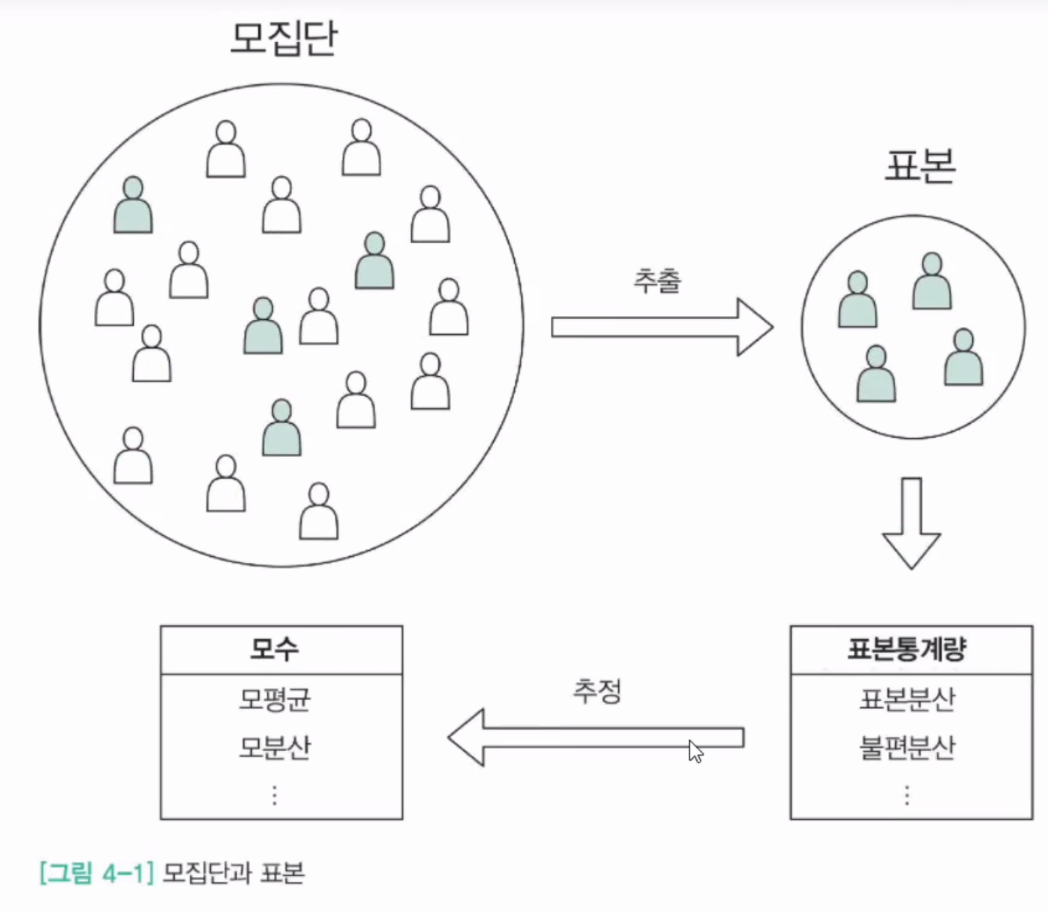    
    
### 표본의 추출방법

- 무작위 추출(임의 추출): 임의로 표본을 추출하는 방법
- 복원추출: 여러 차례 동일한 표본을 선택하는 방법
- 비복원추출: 동일한 표본은 한 번만 선택하는 방법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [3]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = df['score']
scores[:10]

0    76
1    55
2    80
3    80
4    74
5    61
6    81
7    76
8    23
9    80
Name: score, dtype: int64

In [4]:
# 복원추출 : 동일한 숫자가 추출 될 수 있음
np.random.choice([1,2,3],3)

array([2, 1, 2])

In [5]:
# 비복원 추출 : 동일한 숫자가 추출 되지 않는다
np.random.choice([1,2,3],3, replace=False)

array([2, 3, 1])

In [6]:
np.random.seed(123)
np.random.choice([1,2,3],3)

array([3, 2, 3])

In [7]:
# scores 데이터에서 sample 추출

# np.random.seed(0)
sample=np.random.choice(scores, 20)

# 표본 평균
sample.mean()

67.0

In [8]:
# 전체 데이터의 평균
scores.mean()

69.530

In [9]:
for i in range(10):
    sample=np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 데이터의 표본평균 {sample.mean()}')

1번째 무작위 추출로 얻은 데이터의 표본평균 73.4
2번째 무작위 추출로 얻은 데이터의 표본평균 64.75
3번째 무작위 추출로 얻은 데이터의 표본평균 68.95
4번째 무작위 추출로 얻은 데이터의 표본평균 68.9
5번째 무작위 추출로 얻은 데이터의 표본평균 69.7
6번째 무작위 추출로 얻은 데이터의 표본평균 66.2
7번째 무작위 추출로 얻은 데이터의 표본평균 67.3
8번째 무작위 추출로 얻은 데이터의 표본평균 70.8
9번째 무작위 추출로 얻은 데이터의 표본평균 74.25
10번째 무작위 추출로 얻은 데이터의 표본평균 69.8


## 확률 모델

### 확률의 기본

- 확률(probability)
    - 어떤 사건(event)이 일어날 가능성
    - 예. 
        - 동전 던지기에서 앞면이 나올 가능성
        - 주사위 던지기에서 특정 눈금이 나올 확률
        - 주식투자에서 이득을 볼 가능성

- 의사결정
    - 확실성(certainty) 보다는 불확실한 상황에서 이루어지는 경우가 많음
    - 미래에 대한 불확실성의 정도가 더욱 심하다고 할 수 있음 
    - 불확실성 하에서 의사결정의 오류를 줄이기 위해 확률에 대한 연구 필요

### 확률변수 : 취하는 값과 그 값이 나올 확률이 결정되어 있는 것
    - 일정한 확률로 나타나는(발생하는) 사건에 대해 숫자를 부여한 변수
    - ex. 주사위를 굴리면 1-6사이의 숫자가 약 1/6 확률로 발생

- 시행
    - 확률 변수의 결과를 관측하는 것
    - 주사위를 굴리면 어떤 숫자가 나올지 모르지만 숫자는 하나씩 확정
- 실현값
    - 시행에 의해 관측되는 값
    - 주사위를 굴려서 나온 값
- 사건
    - 시행 결과로 나타날 수 있는 일
    - 눈은 1 또는 눈은 홀수 등
    - 주사위의 눈은 확률 변수 X
    - 눈이 1이 되는 사건의 확률 P(x=1)=1/6
    - 눈이 홀수인 사건의 확률 P((X=1)U(X=3)U(X=5) = 1/6+1/6+1/6 = 1/2

    - 근원사건
        - 세부적으로 더 분해할 수 없는 사건
        
        
- 상호배반 : 동시에 일어날 수 없는 사건
    - 눈이 1 또는 2 또는 3’이라는 사건과 ’눈이 6’이라는 사건

## 확률분포

- 확률변수가 어떻게 움직이는지를 나타낸 것

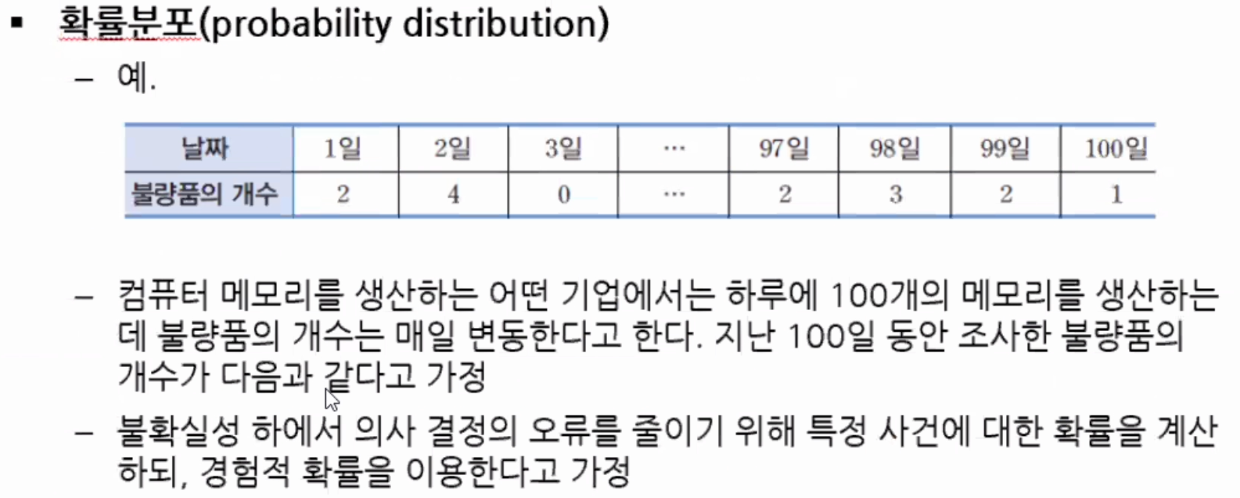
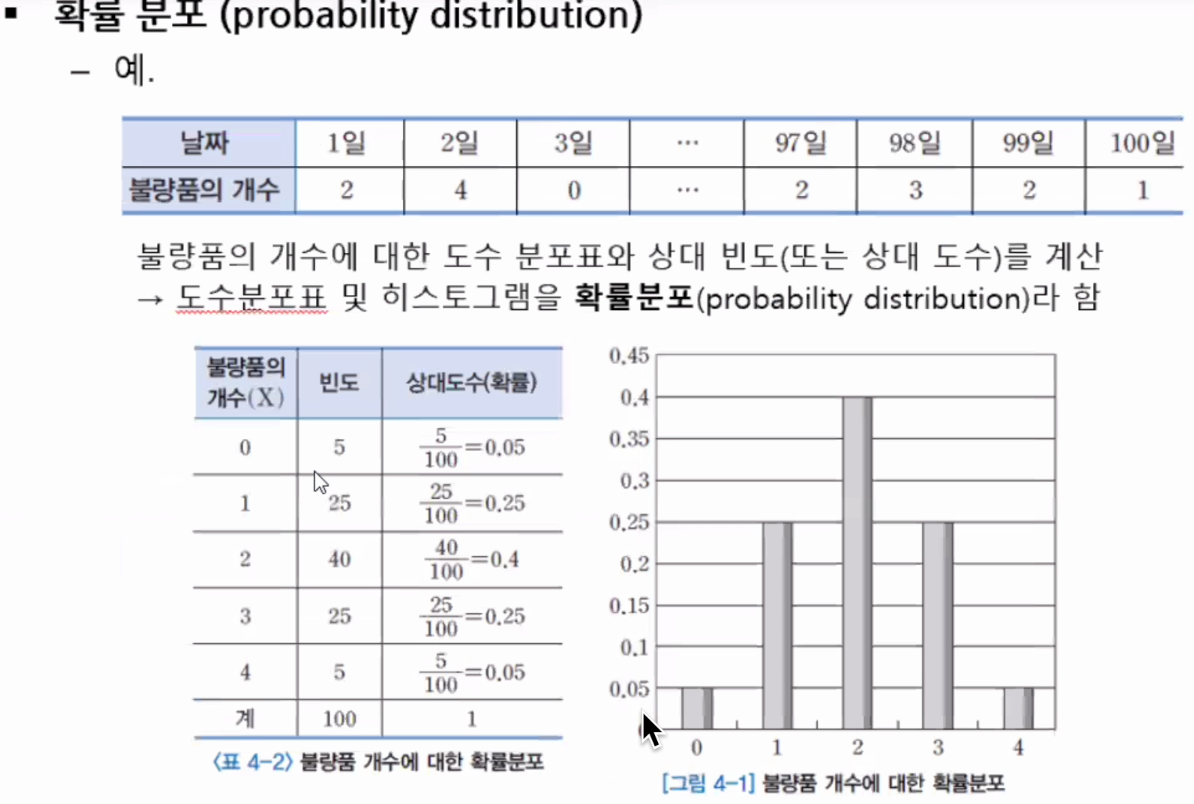

- 공정한 주사위
    - 주사위의 무게 중심이 정확하게 중심에 있는 주사위

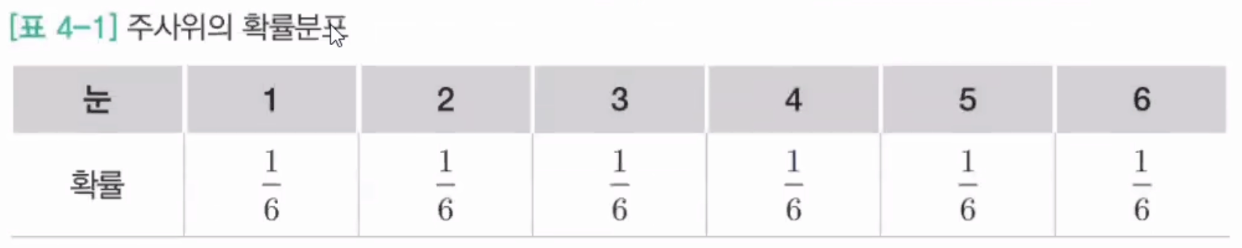

- 불공정한 주사위
    - 주사위의 무게 중심이 중심에 있지 않아 특정한 눈이 더 잘나오는 편향된 주사위
    - 그런 주사위가 있다고 해도 불공정하다는 건 알지만 각 눈이 어느정도의 확률로 나오는 건 알 수 없음


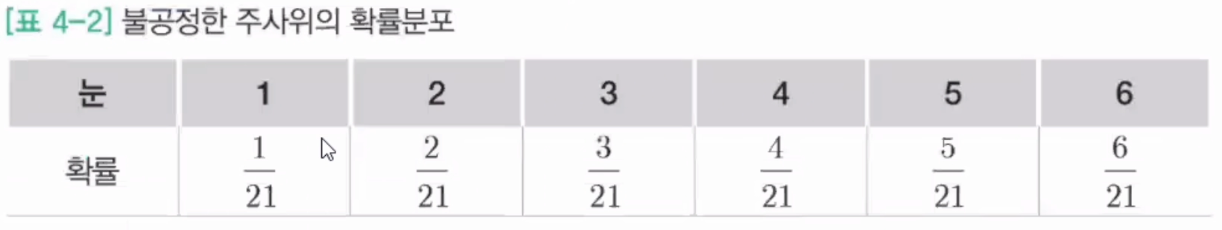

- 주사위를 몇번 굴려 , 그눈의비율을 확률 분포로 추출하는 것이 일반적

- 불공정한 주사위는 위 표의 확률 분포를 따르고, 특정한 눈이 나오기 쉬운 주사위라고 가정


In [10]:
# 불공정한 주사위의 확률분포를 구하는 실험
# 확률 변수에 필요한 변수가 취할 수 있는 값 : dice
dice=[1,2,3,4,5,6]

# 그 값이 나올 수 있는 확률 : prob
prob=[1/21,2/21,3/21,4/21,5/21,6/21]
prob

[0.048, 0.095, 0.143, 0.190, 0.238, 0.286]

- np.random.choice(a, size=None, replace=True, p=None)

    - a : 배열이면 배열 자체, 정수이면 arange(a)명령으로 배열 생성
    - size : 정수, 샘플 숫자
    - replace : boolean. True이면 복원추출, False면 비복원추출
    - p : 배열, 각 데이터가 선택될 수 있는 확률

In [11]:
np.random.choice(dice, p=prob)

4

In [12]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([6, 6, 5, 6, 4, 3, 5, 5, 4, 3, 2, 5, 3, 6, 5, 5, 3, 2, 3, 4, 4, 5,
       3, 5, 6, 2, 5, 5, 2, 6, 4, 5, 5, 4, 6, 6, 5, 4, 5, 4, 4, 3, 5, 6,
       5, 4, 5, 4, 5, 6, 2, 2, 5, 6, 5, 6, 4, 5, 6, 4, 3, 4, 4, 5, 2, 6,
       5, 5, 6, 5, 2, 5, 3, 5, 5, 5, 4, 5, 6, 2, 2, 4, 1, 4, 4, 4, 4, 6,
       5, 5, 2, 6, 4, 2, 3, 5, 5, 4, 2, 5])

In [13]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
             'rel.freq':freq/num_trial},
            index=pd.Index(np.arange(1,7), name='dice'))

,frequency,rel.freq
dice,,
1,1,0.01
2,13,0.13
3,10,0.10
4,23,0.23
5,35,0.35
6,18,0.18


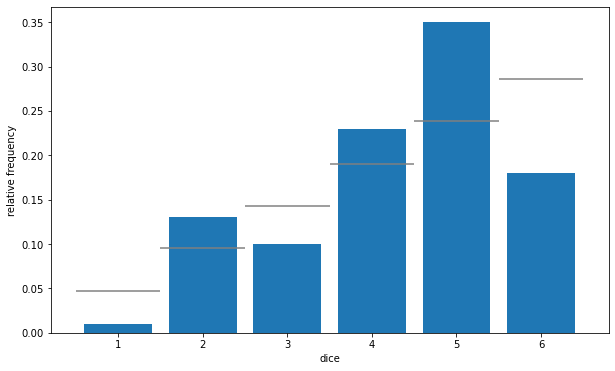

In [14]:
# 100번의 시도는 정해져 있는 확률과는 차이가 있다

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')

# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))

# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

### 10000번 시도 : 실제 확률분포에 가까워짐

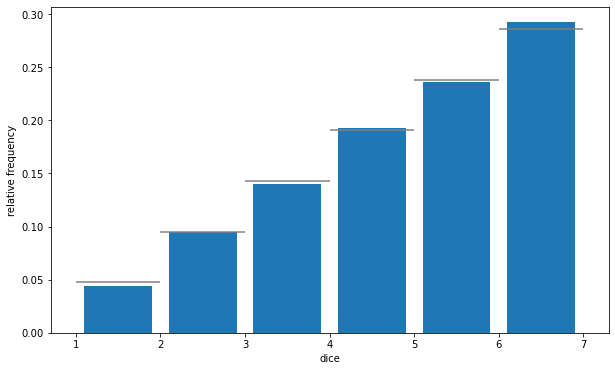

In [15]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# ax.set_xticks(np.linspace(1.5, 6.5, 6))
# ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 추론 통계에서 확률

#### 전교생의 시험점수의 분포를 확인하기 위해 계급폭을 1점으로하여 히스토그램 작성

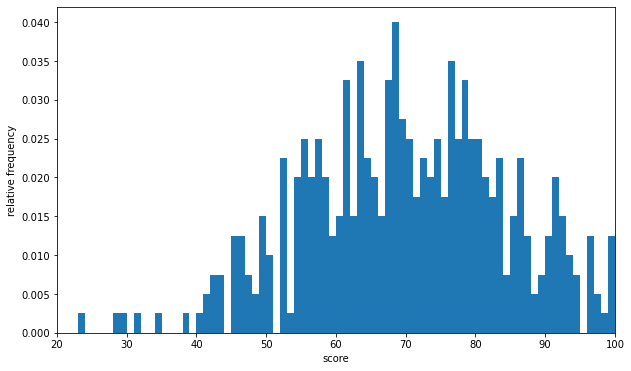

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [17]:
np.random.choice(scores)

55

**시행 횟수를 늘리면 실제 확률 분포에 가까워 짐**
- 확률이므로 반드시 그런건 아님

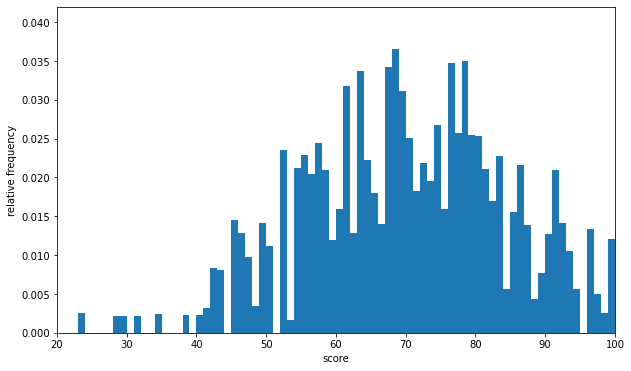

In [18]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

### 표본 평균 

- 표본 하나하나가 확률변수이므로 표본들의 평균으로 계산되는 표본 평균도 확률변수

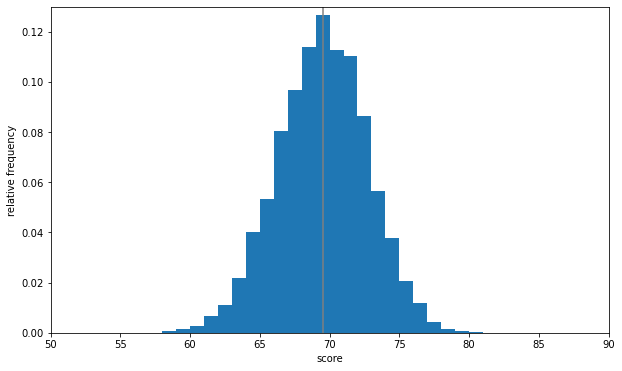

In [19]:
# 무작위 추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행 후 그 결과를 히스토그램으로 표현
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)

# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

- 가운데 세로선이 모평균
- 표본 평균은 산포도 그 자체이므로 모평균을 중심으로 분류
    - 이것이 무작우 추출에 의한 표본 평균으로 모평균을 추측할 수 있는 근거

### 이산형/연속형 확률분포

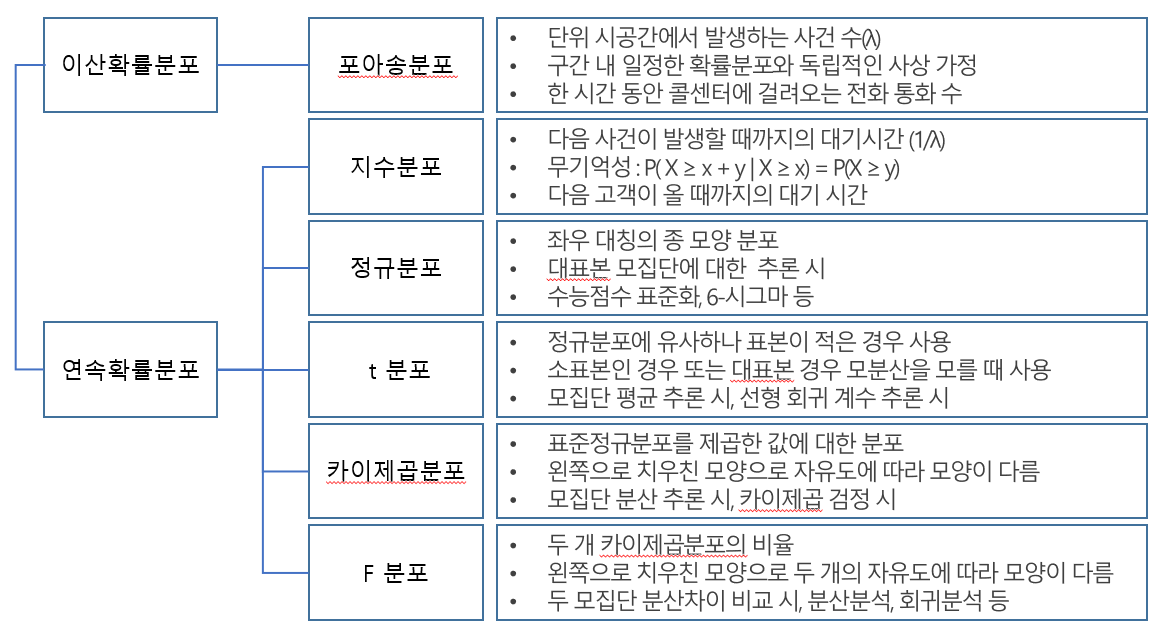